In [1]:
%pip install topas2numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import os
from topas2numpy import read_ntuple  
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# Get the current working directory (where the notebook is located)
base_dir = os.getcwd()  
phsp_folder = os.path.join(base_dir, "..", "data", "input")
#phsp_folder = os.path.join(base_dir, "data/input")  
output_folder = os.path.join(base_dir, "..","data","output")  


# Dictionary to store phase space data categorized by nomenclature
categorized_phsp_data = {}

# Loop through all files in the directory
for file in os.listdir(phsp_folder):
    # Check if the file is a phase space file
    if file.endswith(".phsp"):
        # Full path to the phase space file
        file_path = os.path.join(phsp_folder, filename)
        
        # Load the phase space file using topas2numpy's read_ntuple
        data = read_ntuple(file_path)
        
        # Split the filename based on your nomenclature (underscore as delimiter)
        parts = file.split('_')
        
        # Extract key information from the filename
        beam_type = parts[0]         # Example: '100' (Proton beam)
        beam_energy = parts[1]       # Example: '140-000' (140 MeV)
        material = parts[2]          # Example: 'MAT1' (Air)
        position = parts[3]          # Example: '(-86-5688)' -> extract '-86.5688'
        component = parts[4]         # Example: 'BFWP'
        size = parts[5]              # Example: '6060'
        
        # Create a key for this file based on nomenclature
        key = f"{beam_type}_{beam_energy}_{material}_{position}_{component}_{size}"
        
        # Initialize the nested dictionary for this key if it doesn't exist
        if key not in categorized_phsp_data:
            categorized_phsp_data[key] = {}
        
        # Store the phase space data under this nomenclature key
        categorized_phsp_data[key][file] = data

# Now `categorized_phsp_data` holds all the phase space data grouped by the nomenclature
for file in os.listdir(phsp_folder):
    # Check if the file is a phase space file
    if file.endswith(".phsp"):
        # Full path to the phase space file
        file_path = os.path.join(phsp_folder, file)
        
        # Load the phase space file using topas2numpy's read_ntuple
        data = read_ntuple(file_path)
        
        # Display the structured array's field names (x.dtype.names)
        print(f"File: {file}")
        print("Field Names (dtype):", data.dtype.names)
        print("-" * 40)  # Just to separate the output for each file


File: 100_140-000_MAT1_(-08-5688)_BFWP_6060.phsp
Field Names (dtype): ('Position X [cm]', 'Position Y [cm]', 'Position Z [cm]', 'Direction Cosine X', 'Direction Cosine Y', 'Energy [MeV]', 'Weight', 'Particle Type (in PDG Format)', 'Flag to tell if Third Direction Cosine is Negative (1 means true)', 'Flag to tell if this is the First Scored Particle from this History (1 means true)')
----------------------------------------
File: 100_138-000_MAT1_(-08-5688)_BFWP_6060.phsp
Field Names (dtype): ('Position X [cm]', 'Position Y [cm]', 'Position Z [cm]', 'Direction Cosine X', 'Direction Cosine Y', 'Energy [MeV]', 'Weight', 'Particle Type (in PDG Format)', 'Flag to tell if Third Direction Cosine is Negative (1 means true)', 'Flag to tell if this is the First Scored Particle from this History (1 means true)')
----------------------------------------


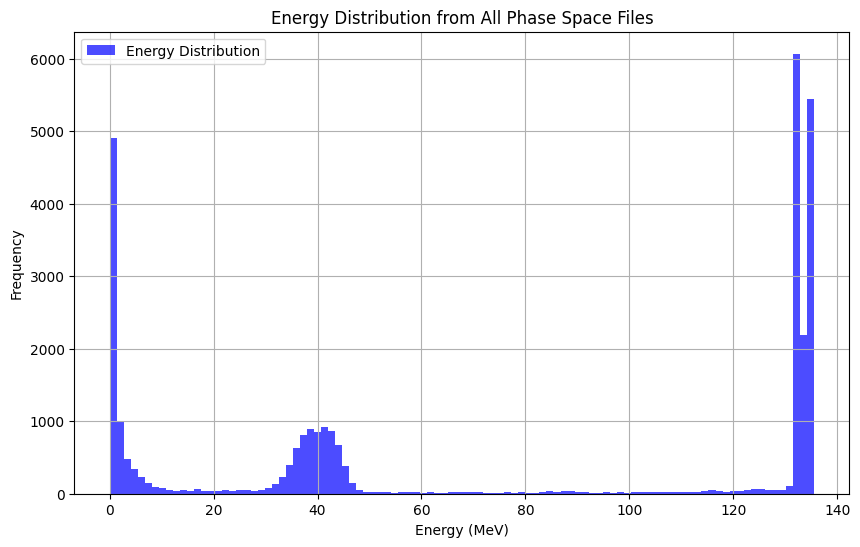

In [38]:
# Dictionary to store DataFrames for each .phsp file
phsp_dataframes = {}

all_energy_data = []

# Loop through all .phsp files in the directory
for file in os.listdir(phsp_folder):
    if file.endswith(".phsp"):
        # Full path to the phase space file
        file_path = os.path.join(phsp_folder, file)

        # Load the phase space file using topas2numpy
        data = read_ntuple(file_path)

        # Convert the structured array to a pandas DataFrame
        df = pd.DataFrame(data)

        # Store the DataFrame in the dictionary with the filename as the key
        phsp_dataframes[file] = df
       
# Loop through the dictionary to extract energy data
for file, df in phsp_dataframes.items():
    # Check if the 'Energy' column exists in the DataFrame
    if 'Energy [MeV]' in df.columns:
        all_energy_data.extend(df['Energy [MeV]'])  # Collect energy data

# Plot the combined energy data
plt.figure(figsize=(10, 6))
plt.hist(all_energy_data, bins=100, color='blue', alpha=0.7, label="Energy Distribution")
plt.title("Energy Distribution from All Phase Space Files")
plt.xlabel("Energy (MeV)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()



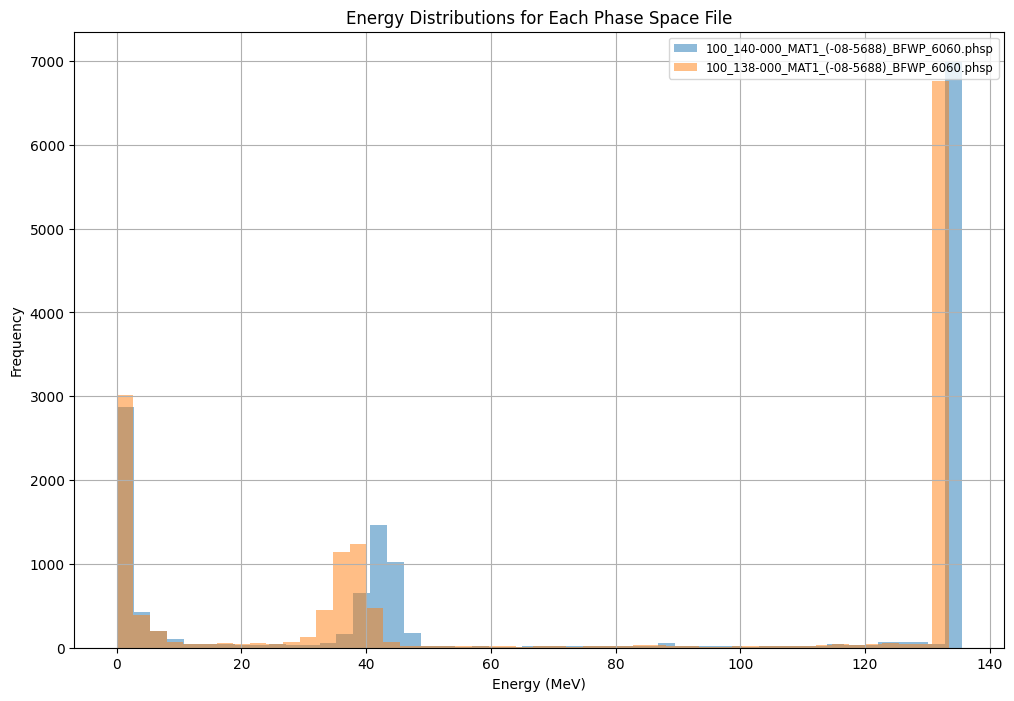

In [44]:
# Dictionary to store DataFrames for each .phsp file
phsp_dataframes = {}

# Loop through all .phsp files in the directory
for file in os.listdir(phsp_folder):
    if file.endswith(".phsp"):
        # Full path to the phase space file
        file_path = os.path.join(phsp_folder, file)

        # Load the phase space file using topas2numpy
        data = read_ntuple(file_path)

        # Convert the structured array to a pandas DataFrame
        df = pd.DataFrame(data)

        # Store the DataFrame in the dictionary with the filename as the key
        phsp_dataframes[file] = df
       
# Plot energy distributions for each file
plt.figure(figsize=(12, 8))

for file, df in phsp_dataframes.items():
    # Check if the 'Energy [MeV]' column exists in the DataFrame
    if 'Energy [MeV]' in df.columns:
        plt.hist(df['Energy [MeV]'], bins=50, alpha=0.5, label=file)

# Customize the plot
plt.title("Energy Distributions for Each Phase Space File")
plt.xlabel("Energy (MeV)")
plt.ylabel("Frequency")
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

# Use tight_layout to adjust spacing
plt.tight_layout()

# Save the combined graph
output_path = os.path.join(output_folder, "1.png")
plt.savefig(output_path)
plt.close()  # Close the plot to free memory